In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

/Users/anuragmakineni/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [29]:
#### INPUTS ####

## MASS ##
boat_empty_mass = 15.0 # kg
payload_mass = np.linspace(2.0, 20.0, 5) # kg

## DIMENSIONS ##
boat_width = 0.75 # m
boat_length = 1.0 # m

## PERFORMANCE ##
velocity = np.linspace(0.1, 3.5, 50) # m / s
max_range = 45.0 * 1000.0 # m

## MISC ##
water_density = 1000.0 # kg / m^3
c_d = 1.28 # ul (Flat Plate: https://www.grc.nasa.gov/www/k-12/airplane/shaped.html)
battery_energy_density = 200.0 # Wh / kg

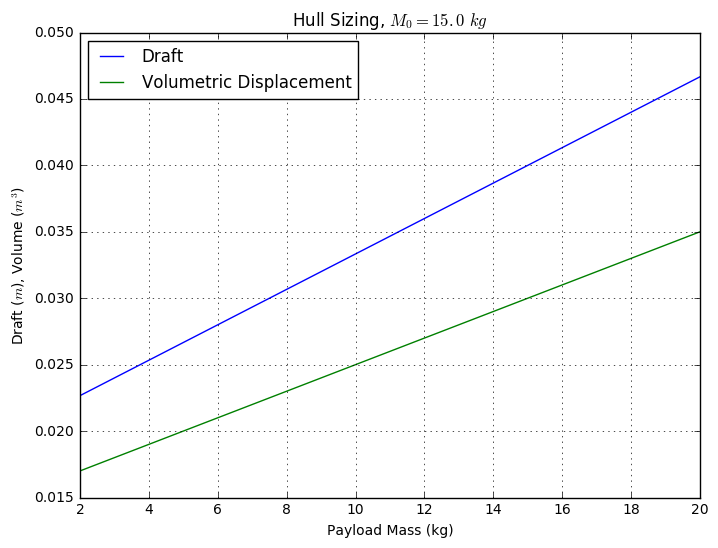

In [30]:
#### Hull Size Calculation ####
total_mass = boat_empty_mass + payload_mass
displaced_volume = total_mass / water_density

boat_area = boat_width * boat_length
draft = displaced_volume / boat_area

plt.figure(figsize=(8,6))
plt.plot(payload_mass, draft)
plt.plot(payload_mass, displaced_volume)
plt.xlabel(r'Payload Mass (kg)')
plt.ylabel(r'Draft ($m$), Volume ($m^3$)')
plt.title(r'Hull Sizing, $M_0 = ' + str(boat_empty_mass) + '\ kg$')
plt.legend(['Draft', 'Volumetric Displacement'], loc=0)
plt.grid(1)
plt.savefig('hull_size.png')
plt.show()

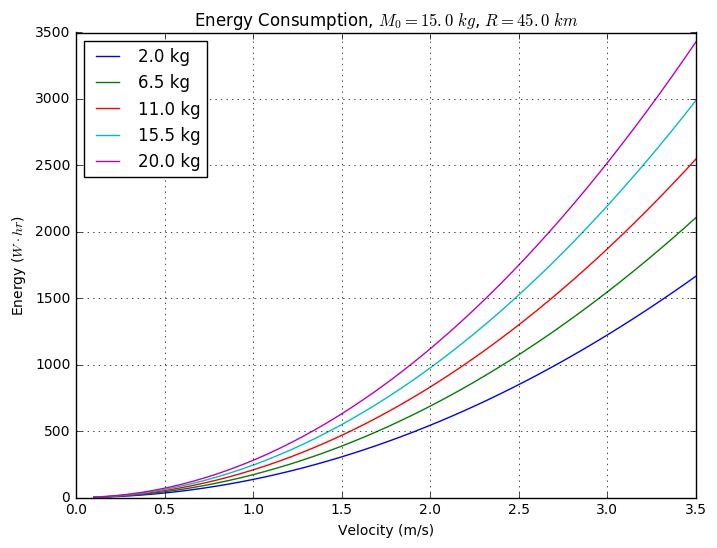

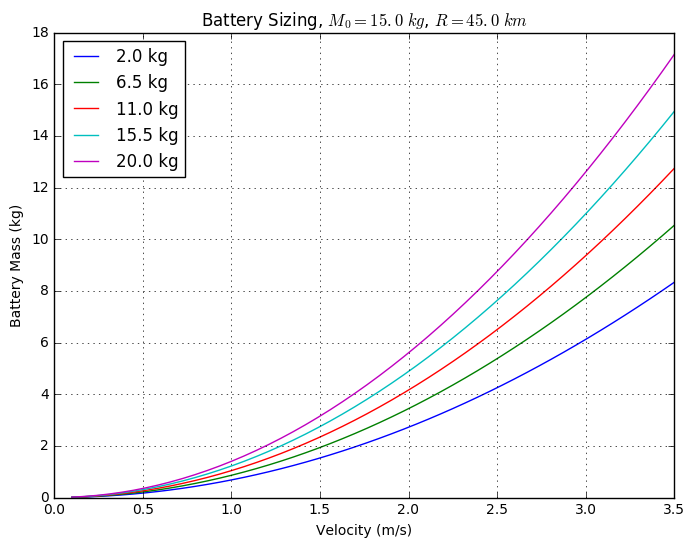

In [32]:
#### Power Consumption Calculation ####
frontal_area = draft * boat_width

plt.figure(figsize=(8,6))
for i in range(0, len(frontal_area)):
    A = frontal_area[i]
    drag_force = 0.5 * c_d * water_density * velocity**2 * A
    power = drag_force * velocity
    energy = power * (max_range / velocity) / 3600.0 # W-h
    plt.plot(velocity, energy, label=str(payload_mass[i]) + ' kg')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Energy ($W \cdot hr$)')
plt.title(r'Energy Consumption, $M_0 = ' + str(boat_empty_mass) + '\ kg$, $R = ' + str(max_range/1000.0) + '\ km$')
plt.legend(loc=0)
plt.grid(1)
plt.savefig('energy.png')
#### Battery Mass Calculation ####
frontal_area = draft * boat_width
plt.figure(figsize=(8,6))
for i in range(0, len(frontal_area)):
    A = frontal_area[i]
    drag_force = 0.5 * c_d * water_density * velocity**2 * A
    power = drag_force * velocity
    energy = power * (max_range / velocity) / 3600.0 # W-h
    battery_mass = energy / battery_energy_density
    plt.plot(velocity, battery_mass, label=str(payload_mass[i]) + ' kg')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Battery Mass (kg)')
plt.title(r'Battery Sizing, $M_0 = ' + str(boat_empty_mass) + '\ kg$, $R = ' + str(max_range/1000.0) + '\ km$')

plt.legend(loc=0)
plt.grid(1)
plt.savefig('battery.png')
plt.show()